In [1]:
# Importing necessary packages

import pandas as pd
from IPython.display import display

from tqdm import tqdm
tqdm.pandas()

import numpy as np

from spacy.lang.en import English
nlp = English()

from spacy.lang.en.stop_words import STOP_WORDS

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Reading in data
mbti_df = pd.read_csv('../mbti_1.csv')

In [3]:
# converting each observation into a list of posts
mbti_df['posts'] = mbti_df['posts'].map(lambda x: list(x.split('|||')))

In [4]:
# Inspecting data
mbti_df.head()

,type,posts
0,INFJ,"['http://www.youtube.com/watch?v=qsXHcwe3krw, ..."
1,ENTP,['I'm finding the lack of me in these posts ve...
2,INTP,['Good one _____ https://www.youtube.com/wa...
3,INTJ,"['Dear INTP, I enjoyed our conversation the ..."
4,ENTJ,"['You're fired., That's another silly misconce..."


In [5]:
# Not all the users had the same number of posts, but the majority had 50 so we will select those that had 50 posts. 
# Consider treating each post as an observation as opposed to each individual - drastically increase sample size. 
mbti_df['num_posts'] = mbti_df['posts'].map(lambda x: len(x))
mbti_df = mbti_df[mbti_df['num_posts'] == 50].reset_index(drop=True)

In [6]:
# Setting up new column names to assign to each post
post = 'Post {}'
nums = range(1, 51)
posts = []
for num in nums: 
    posts.append(post.format(str(num)))

In [7]:
# New dataframe with each post in its own column
df_update = pd.DataFrame(mbti_df['posts'].to_list(), columns=posts)
df_update['type'] = mbti_df['type']

In [8]:
df_update.head(1)

,Post 1,Post 2,Post 3,Post 4,Post 5,Post 6,Post 7,Post 8,Post 9,Post 10,...,Post 42,Post 43,Post 44,Post 45,Post 46,Post 47,Post 48,Post 49,Post 50,type
0,'http://www.youtube.com/watch?v=qsXHcwe3krw,http://41.media.tumblr.com/tumblr_lfouy03PMA1q...,enfp and intj moments https://www.youtube.com...,What has been the most life-changing experienc...,http://www.youtube.com/watch?v=vXZeYwwRDw8 h...,May the PerC Experience immerse you.,The last thing my INFJ friend posted on his fa...,Hello ENFJ7. Sorry to hear of your distress. I...,84389 84390 http://wallpaperpassion.com/uplo...,Welcome and stuff.,...,Not all artists are artists because they draw....,"Welcome to the robot ranks, person who downed ...",Banned for taking all the room under my bed. Y...,http://www.youtube.com/watch?v=w8IgImn57aQ,"Banned for being too much of a thundering, gru...",Ahh... old high school music I haven't heard i...,I failed a public speaking class a few years a...,I like this person's mentality. He's a confirm...,Move to the Denver area and start a new life f...,INFJ


In [9]:
# treating each post as its own observation
split_df = pd.DataFrame({'type':np.repeat(mbti_df['type'].values, mbti_df['posts'].str.len()), 'post':np.concatenate(mbti_df['posts'].values)})
split_df.head()

,type,post
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw
1,INFJ,http://41.media.tumblr.com/tumblr_lfouy03PMA1q...
2,INFJ,enfp and intj moments https://www.youtube.com...
3,INFJ,What has been the most life-changing experienc...
4,INFJ,http://www.youtube.com/watch?v=vXZeYwwRDw8 h...


In [10]:
# Inspect our classes
display(pd.DataFrame(split_df['type'].value_counts()).T)
print("Total number of observations: {}".format(str(len(split_df))))

,INFP,INFJ,INTP,INTJ,ENTP,ENFP,ISTP,ISFP,ENTJ,ISTJ,ENFJ,ISFJ,ESTP,ESFP,ESFJ,ESTJ
type,81800,65250,57450,46700,29600,28600,15100,11300,10300,8350,8300,7250,4000,1800,1800,1750


Total number of observations: 379350


Text(0.5, 1.0, 'Counts of Personality Types')

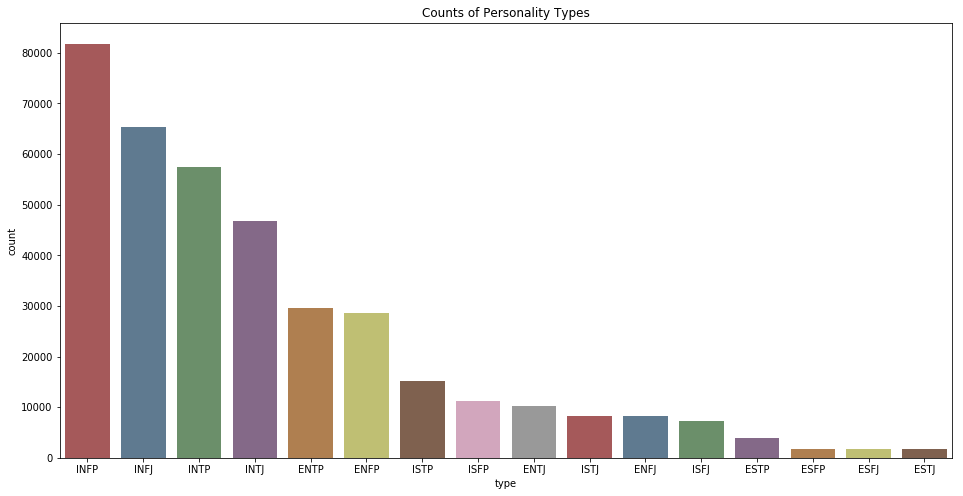

In [16]:
# plot the counts of the personality types for EDA
# interesting that not only is the majority of the data introverts, it's specifically "IN"s 
# will do some research on this later
plt.figure(figsize=(16, 8))
sns.countplot(x='type', data=split_df, order=split_df['type'].value_counts().index,
              palette=sns.color_palette("Set1", n_colors=16, desat=.5)).set_title("Counts of Personality Types")

In [16]:
# Classify each post into either "introverted" or "extroverted"

split_df['vert'] = split_df['type'].apply(lambda x: 'introvert' if x[0] == 'I' else 'extrovert')

In [17]:
# Very interesting class imbalance - I would expect extroverts to be more active on a forum but perhaps introverts spend more time on social media? Look into this later

pd.DataFrame(split_df['vert'].value_counts())

,vert
introvert,293200
extrovert,86150


Text(0.5, 1.0, 'Number of introverts and extroverts')

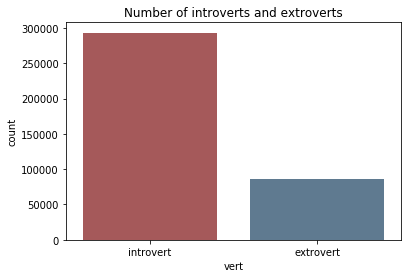

In [18]:
# prelim data viz of class imbalance
sns.countplot(x='vert', data=split_df, palette=sns.color_palette("Set1", n_colors=2, desat=.5)).set_title("Number of introverts and extroverts")

In [19]:
# # Set up preliminary nlp cleaning
# def token_rem_stop(doc):
# #   Tokenize each doc
#     tokens = []
#     for token in doc: 
#         tokens.append(token.text)
# #   Remove stop words from tokens        
#     rem_stop = []
#     for token in tokens: 
#         lex = nlp.vocab[token]
#         if lex.is_stop == False:
#             rem_stop.append(token)
        
#     return rem_stop


In [28]:
def clean_text(document):
    """
    Text preprocessing with lemmatization and tokenization for forum posts. 
    
    Parameters: 
    document (str): forum post
    
    Returns: 
    list: list of tokenized lemmatized words
    """
    # create nlp object
    doc = nlp(document)
    # lemmatize each word
    lemmaed = [word.lemma_ for word in doc]
    # tokenize the lemmatized words
    tokens = [token.lower() for token in lemmaed]
    words = [token for token in tokens if token not in STOP_WORDS]
    return words

In [29]:
split_df['cleaned'] = split_df['post'].progress_apply(lambda x: clean_text(x))

100%|██████████| 379350/379350 [02:29<00:00, 2541.96it/s]


In [30]:
split_df.head()


,type,post,vert,cleaned
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw,introvert,"[', http://www.youtube.com/watch?v=qsxhcwe3krw]"
1,INFJ,http://41.media.tumblr.com/tumblr_lfouy03PMA1q...,introvert,[http://41.media.tumblr.com/tumblr_lfouy03pma1...
2,INFJ,enfp and intj moments https://www.youtube.com...,introvert,"[enfp, intj, moment, , https://www.youtube.co..."
3,INFJ,What has been the most life-changing experienc...,introvert,"[life, -, change, experience, life, ?]"
4,INFJ,http://www.youtube.com/watch?v=vXZeYwwRDw8 h...,introvert,"[http://www.youtube.com/watch?v=vxzeywwrdw8, ..."
